In [2]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Muddu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df=pd.read_csv("twitter_train_data.csv",sep="\t",header=None,index_col=False)

In [4]:
df.head()

,0,1
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [5]:
df[0].value_counts()

1    3943
0    2975
Name: 0, dtype: int64

In [6]:
df.rename(columns={0:'Sentiment',1:'tweet'},inplace=True)

In [7]:
df.head()

,Sentiment,tweet
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


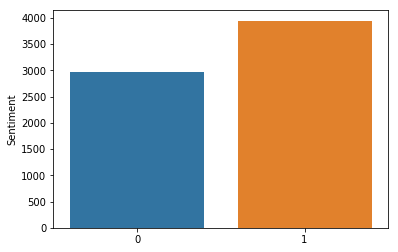

In [8]:
sns.barplot(x=df['Sentiment'].unique(),y=df['Sentiment'].value_counts())

In [9]:
df['tweet'].isna().sum()

0

In [10]:
## Checking for blank tweets if any
blank=[]
for i,sent,rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blank.append(rv)
        

In [11]:
len(blank) ## No blank tweets are present in the data set

0

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer ## Importing Sentiment Intensity Analyser  from vader

In [13]:
sid=SentimentIntensityAnalyzer()

In [14]:
df.iloc[123],['tweet'] ## aurbitoryly checking for a tweet from the data set 

(Sentiment                                           1
 tweet        Da Vinci Code is a friggin awesome book.
 Name: 123, dtype: object, ['tweet'])

In [15]:
sid.polarity_scores(df.iloc[225]['tweet'])## polarity dcore for that particular tweet

{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.6892}

In [16]:
df.iloc[225]['Sentiment'] ## sentiment as given in the  train data set. We are going to comapre this with the result

1

In [17]:
df['scores']=df['tweet'].apply(lambda tweet:sid.polarity_scores(tweet))

In [18]:
df.head()

,Sentiment,tweet,scores
0,1,The Da Vinci Code book is just awesome.,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp..."
1,1,this was the first clive cussler i've ever rea...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp..."
2,1,i liked the Da Vinci Code a lot.,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp..."
3,1,i liked the Da Vinci Code a lot.,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp..."
4,1,I liked the Da Vinci Code but it ultimatly did...,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp..."


In [19]:
df['compound']=df['scores'].apply(lambda d:d['compound'])

In [20]:
df.head()

,Sentiment,tweet,scores,compound
0,1,The Da Vinci Code book is just awesome.,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",0.6249
1,1,this was the first clive cussler i've ever rea...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.5023
2,1,i liked the Da Vinci Code a lot.,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...",0.4215
3,1,i liked the Da Vinci Code a lot.,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...",0.4215
4,1,I liked the Da Vinci Code but it ultimatly did...,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.2263


In [21]:
df['comp_score']=df['compound'].apply (lambda score:1 if score>=0 else 0)

In [22]:
df.head()

,Sentiment,tweet,scores,compound,comp_score
0,1,The Da Vinci Code book is just awesome.,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",0.6249,1
1,1,this was the first clive cussler i've ever rea...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.5023,1
2,1,i liked the Da Vinci Code a lot.,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...",0.4215,1
3,1,i liked the Da Vinci Code a lot.,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...",0.4215,1
4,1,I liked the Da Vinci Code but it ultimatly did...,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.2263,1


In [23]:
df.iloc[559][['Sentiment','comp_score']]

Sentiment     1
comp_score    1
Name: 559, dtype: object

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
accuracy_score(df['comp_score'],df['Sentiment'])

0.8498120844174617

In [26]:
print(classification_report(df['comp_score'],df['Sentiment']))

              precision    recall  f1-score   support

           0       0.72      0.92      0.80      2332
           1       0.95      0.82      0.88      4586

   micro avg       0.85      0.85      0.85      6918
   macro avg       0.83      0.87      0.84      6918
weighted avg       0.87      0.85      0.85      6918



In [27]:
print(confusion_matrix(df['comp_score'],df['Sentiment']))

[[2134  198]
 [ 841 3745]]


******* End ******